In [2]:
from matplotlib.colors import ListedColormap
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import random

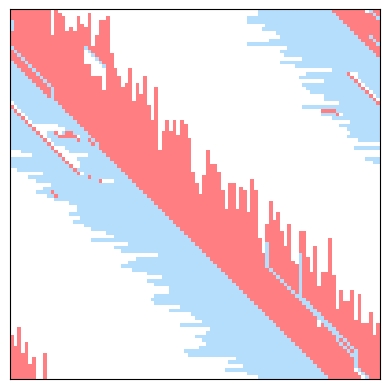

In [3]:
class BML:
    def __init__(self, n, m):
        """
        Sets up an empty grid for a biham-middleton-levine model.
        
        args:
            n: int length of grid
            m: int width of grid     
        """
        self.array = np.zeros((n, m), dtype=np.int8)
        self.n = n
        self.m = m
        self.cmap = ListedColormap(['white', '#95d0fc', '#ff474c'])

    def start_small(self):
        """
        A preset starting config with 1 blue cell and 2 red cells.
        """
        self.array[0, self.m//2] = 1
        self.array[0, self.m//2 +1] = 2
        self.array[self.n//2, 0] = 2

    def start_density(self, density):
        """
        Randomly adds red and blue cells throughout a grid to a specific density.

        args:
            density: an int between 0 anf 1 to determine how full the grid is
        """
        for i in range(len(self.array)):
            for j in range(len(self.array[i])):
                self.array[i][j] = np.random.choice([0,1,2], p=[1-density, density/2, density/2])
        print(self.array)

    def step_blue(self):
        """
        Move all blue cells one over to the left if the next cell is empty.
        """
        for row in self.array:
            cell_0 = row[0]
            i = 0
            while i  < len(row):
                if i == len(row) - 1:
                    if row[i] == 1 and cell_0 == 0:
                        row[i] = 0
                        row[0] = 1
                    break
                else:
                    if row[i] == 1 and row[i+1] == 0:
                        row[i] = 0
                        row[i+1] = 1
                        i += 2
                    else:
                      i+=1

    def step_red(self):
        """
        Move all red cells downward one if the next cell is empty.
        """
        self.array = self.array.T
        for row in self.array:
            cell_0 = row[0]
            i = 0
            while i  < len(row):
                if i == len(row) - 1:
                    if row[i] == 2 and cell_0 == 0:
                        row[i] = 0
                        row[0] = 2
                    break
                else:
                    if row[i] == 2 and row[i+1] == 0:
                        row[i] = 0
                        row[i+1] = 2
                        i += 2
                    else:
                      i+=1
        self.array = self.array.T

    def loop(self, steps=1):
        """
        Create complete cycles of blue and then red cell moving.

        args:
            steps: an int of the number of cycles
        """
        for _ in range(steps):
            self.step_blue()
            self.step_red()

    def animate(self, frames=1, interval=None):
        """
        Animates the cycles.

        args:
            frames: an int of the number of frames
            interval: an int of the time to put between frames
        """
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                self.loop()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass

    def draw(self, start=0, end=None):
      """
      Draw the current grid.

      args:
        start: an int index to represent where to start displaying
        end: an int index to represent where to stop displaying
      """
      a = self.array[:, start:end]
      plt.imshow(a, cmap=self.cmap, alpha=0.7)

      # turn off axis tick marks
      plt.xticks([])
      plt.yticks([])


bml = BML(100, 100)
bml.start_density(0.5)
bml.animate(frames=1000)